In [6]:
import requests
import os
import sys
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

OUTPUT_DIR = os.path.join(os.getcwd(), 'compare_outputs')

location = lambda x: os.path.join(os.path.join(os.getcwd(), 'tmp'), x)

%matplotlib inline


In [8]:
def show_images(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

In [9]:

def get_outputs(sample_file):
    # url = 'http://localhost:5000/layer/max_pooling2d_3/{}'.format(sample_file)
    url = 'http://localhost:5000/predict/{}'.format(sample_file)
    res = requests.get(url)

    url = 'http://localhost:5000/layer/conv2d_1/{}'.format(sample_file)
    return requests.get(url).json()


def build_img(benign, malicious):
    compare_outpus = zip(get_outputs(benign), get_outputs(malicious))
    for index, (b, m) in enumerate(compare_outpus):
        b, m = location(b), location(m)
        show_images([b,m])
#         list_im = [b, m]
#         imgs = [Image.open(i) for i in list_im]
#         # pick the image which is the smallest, and resize the others to match
#         # it (can be arbitrary image shape here)
#         min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]
#         imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))

#         # save that beautiful picture
#         imgs_comb = Image.fromarray(imgs_comb)

#         # width, height = imgs_comb.size
#         # draw = ImageDraw.Draw(imgs_comb)
#         # draw.line((0,0, height,width), fill=128)
#         filename = os.path.join(OUTPUT_DIR, '{}.png'.format(index))
#         imgs_comb.save(filename)

#         # imgs_comb = PIL.Image.fromarray( imgs_comb)
#         # new_im.save(filename)
        
#         plt.imshow(b)
#         print(b, m)


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


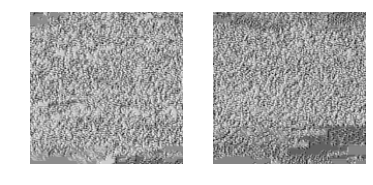

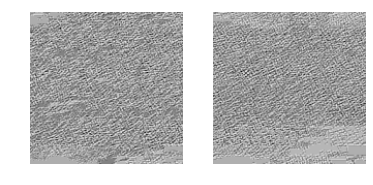

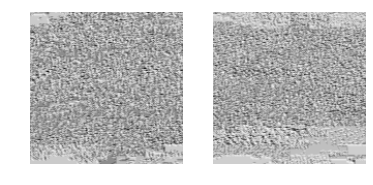

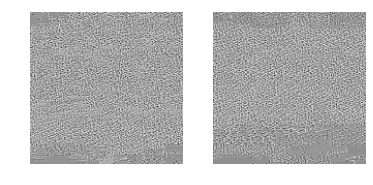

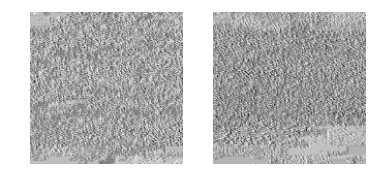

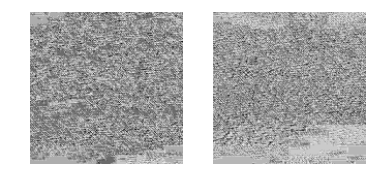

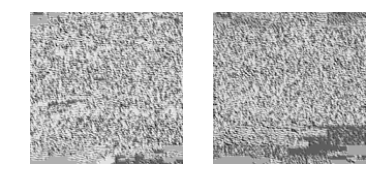

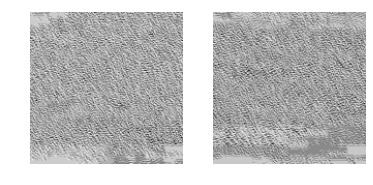

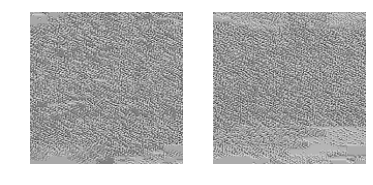

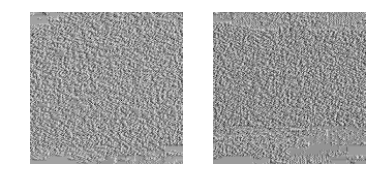

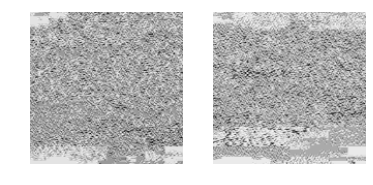

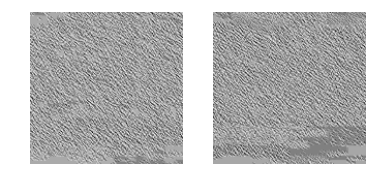

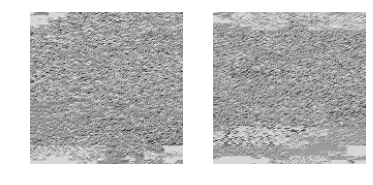

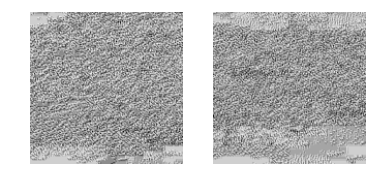

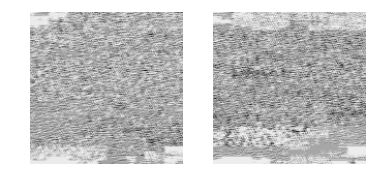

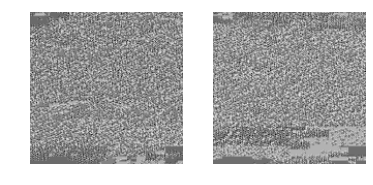

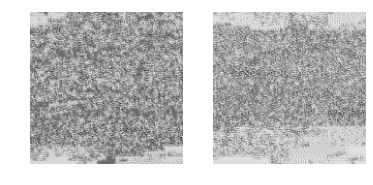

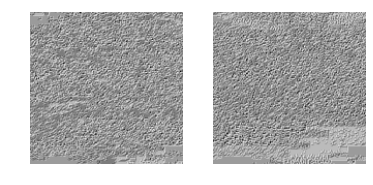

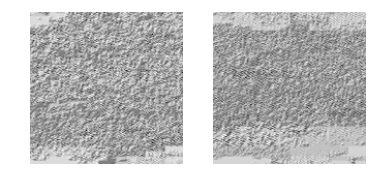

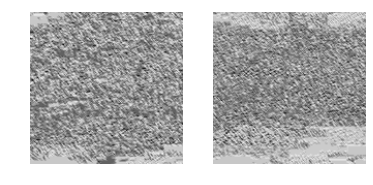

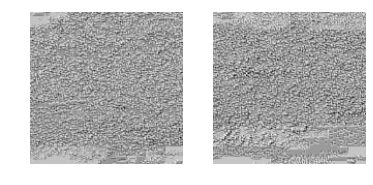

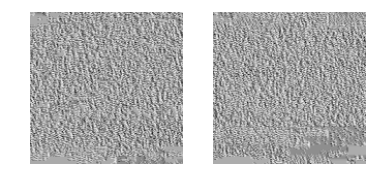

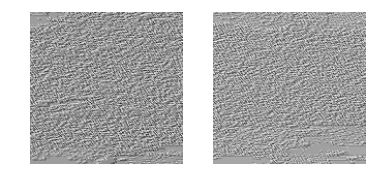

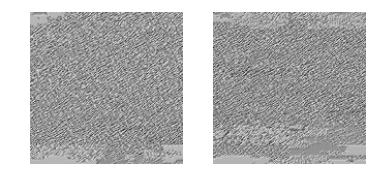

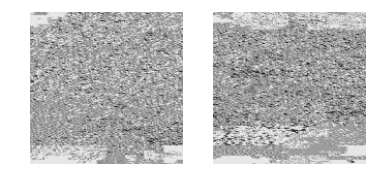

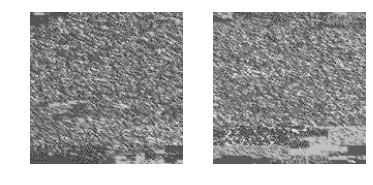

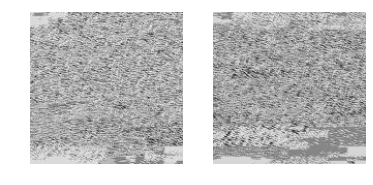

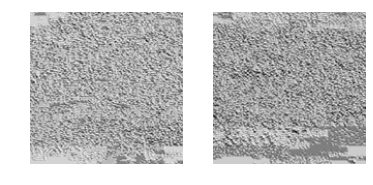

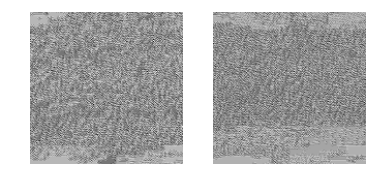

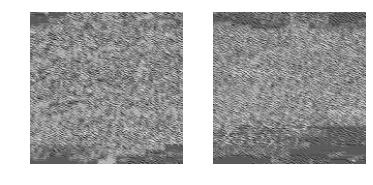

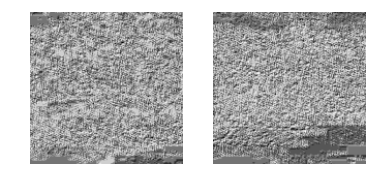

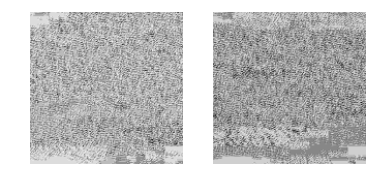

In [10]:

benign = '003a27a2e8dcfe385e7603eaabde1d60865e765f20b1c6b3a8370d0f9ebbedfe.png'
malicious = '0063d7dad57ca78c3dce6a2e7d4ff7a47dbbbbaa33f92aef747d8102e055d1aa.png'
# print(get_outputs(benign))
build_img(benign, malicious)

In [ ]:
benign = '0a1233bafdacf45b5ff57781b86057befde23b7afc4b22dd997c9564cd9eaf93.png'
malicious = '0aba5d49c7d46a64f57a145fc9fd5bf9706d295baf0ff8a3b77ea0bb75b1a440.png'
# print(get_outputs(benign))
build_img(benign, malicious)